<a href="https://colab.research.google.com/github/SyilaArviani/Data-Mining-Course/blob/main/041_A2_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_excel("dataset_market_basket.xlsx")

In [ ]:
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sum() #1 items set

whole milk             5
pastry                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [ ]:
df.columns #menampilkan item scr keseluruhan

Index(['whole milk', 'pastry', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [ ]:
# 2 item set, library utk kombinasi barang
from itertools import permutations 

rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('

In [ ]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls

In [ ]:
hitung = {} # Filter yang ada isinya aja yang dihitung
#memfilter dengan nama kolom
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 "('can

In [ ]:
# utk melihat banyaknya transaksi
len(df)

19

In [ ]:
# List support
# supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles') support = 5.263157894736842%
('sausage', 'rolls/buns') support = 10.526315789473683%
('semi-finished bread', 'whole 

In [ ]:
# List Confidence
#print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->w

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

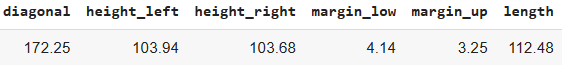
<!-- 1412 -->

In [5]:
import pandas as pd
df2 = pd.read_csv("deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediks

In [6]:
import math

data = {
    'is_genuine': ['TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE'],
    'diagonal': [172.06, 171.66, 172.23, 172.07, 171.79, 172.0, 171.56, 171.9, 171.84, 172.11],
    'height_left': [104.24, 103.68, 104.0, 104.21, 104.57, 104.23, 104.03, 104.33, 104.06, 104.14],
    'height_right': [103.66, 103.41, 103.35, 103.82, 104.04, 104.52, 103.93, 104.4, 104.1, 104.15],
    'margin_low': [4.24, 4.35, 4.43, 4.29, 4.26, 5.76, 5.47, 4.7, 4.87, 4.84],
    'margin_up': [3.1, 3.33, 2.95, 3.35, 3.15, 3.37, 3.5, 3.31, 3.25, 3.28],
    'length': [113.02, 113.74, 113.12, 113.3, 113.46, 110.94, 111.67, 112.12, 111.04, 110.98]
}

target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

# Membuat list untuk menampung jarak antara tiap data dengan target
jarak = []
for i in range(len(data['is_genuine'])):
    diagonal = data['diagonal'][i] - target[0]
    height_left = data['height_left'][i] - target[1]
    height_right = data['height_right'][i] - target[2]
    margin_low = data['margin_low'][i] - target[3]
    margin_up = data['margin_up'][i] - target[4]
    length = data['length'][i] - target[5]
    jarak.append(math.sqrt(diagonal**2 + height_left**2 + height_right**2 + margin_low**2 + margin_up**2 + length**2))

print(jarak)

[0.6712674578735285, 1.4583209523283898, 0.8346256645946192, 0.9109335870413307, 1.3125928538583398, 2.42128065287773, 1.741895519254815, 1.113463066293622, 1.722033681435988, 1.7382174777627788]


In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

In [7]:
# Menghitung K berdasarkan akar dua dari banyak data
K = round(math.sqrt(len(jarak)))

# Membuat DataFrame dari data dan jarak
df = pd.DataFrame(data)
df['jarak'] = jarak

# Mengurutkan DataFrame berdasarkan jarak terdekat dan mengambil K teratas
df_sorted = df.sort_values('jarak').head(K)

# Menampilkan hasil
print(df_sorted)

  is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0       TRUE    172.06       104.24        103.66        4.24       3.10   
2       TRUE    172.23       104.00        103.35        4.43       2.95   
3       TRUE    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

In [8]:
k = round(math.sqrt(len(data['is_genuine'])))
# Membuat list dari indeks data terdekat dengan target
indeks_terdekat = sorted(range(len(jarak)), key=lambda k: jarak[k])[:k]

# Mengambil label dari data yang terdekat
label_terdekat = [data['is_genuine'][i] for i in indeks_terdekat]

# Menghitung label terbanyak
label_prediksi = max(set(label_terdekat), key=label_terdekat.count)

# Menampilkan hasil prediksi
print("Hasil prediksi: ", label_prediksi)

Hasil prediksi:  TRUE


# (3) Analisis

> Nama : Syila Arviani 

> Nim : 2109116041




Tema : Kesehatan

Link : https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Business Understanding

1. Pemahaman Bisnis **(Determine Business Objective)**

---

Perusahaan asuransi dapat menggunakan kumpulan data ini untuk menganalisis rencana dan premi asuransi mereka sendiri, dan membuat penyesuaian harga dan cakupan berdasarkan hasil yang diperoleh dari data.

2. Menilai Situasi **(Assess Situation)**

---


Situasi ini adalah sebuah industri asuransi yang sudah tidak asing dengan pengambilan keputusan berdasarkan data. Namun dalam digital landscape yang berubah dengan cepat saat ini, pihak asuransi sedang berusaha untuk beradaptasi dan memanfaatkan teknologi baru dibandingkan dengan industri lain.

3. Menentukan Tujuan Data Mining **(Determine the Data Mining Goals)**
---
Tujuannya adalah untuk melakukan prediksi terhadap biaya premi asuransi, memahami penjaminan risiko dalam asuransi kesehatan dan melihat bagaimana pengaruhnya terhadap premi asuransi.

4. Membuat rencana proyek **(Produce Project Plan)**

---

Rencana proyeknya adalah menentukan permasalahan serta bagaimana dataset akan membantu permasalahan tersebut, mengumpulkan dan melakukan data cleaning, melakukan data exploration, membuat model prediksi dan mengevaluasi efektivitas dari model prediksi atau solusi.

# Data Understanding

1. Mengumpulkan Data Awal **(Collect the Initial Data)**

---
Data yang dikumpulkan dari dataset adalah  data dari hasil observasi pemilik dataset yang telah di upload pada Kaggle.

2. Mendeskripsikan Data **(Describe the Data)**

---
Adapun atribut dari dataset ini yaitu 

*   Umur (Age)
*   Jenis Kelamin (Sex)
*   Body Mass Index (BMI)
*   Jumlah anak yang dilindungi oleh asuransi (Children)
*   Keterangan Merokok / Tidak Merokok (smoker)
*   Wilayah/Daerah (Region)
*   Biaya yang ditagih oleh asuransi (Charges)

3. Mendeskripsikan Data **(Data Exploration)**

---
Dataset ini berisi 1338 baris data dan  atribut yang digunakan pada data set ini  adalah campuran variabel numerik dan kategori.


In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
import plotly.express as px

In [ ]:
px.pie(df,names="age")
#menampilkan umur dalam bentuk persentase

<Axes: xlabel='children', ylabel='count'>

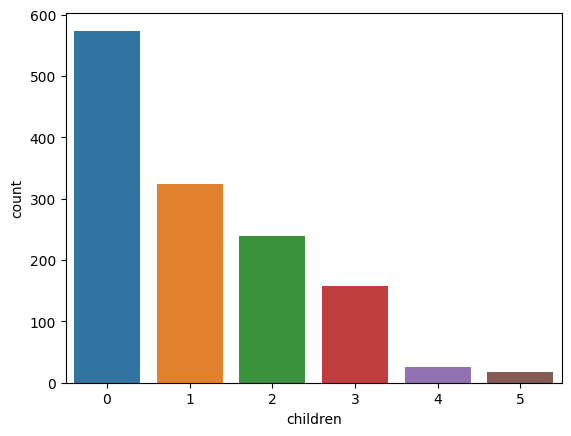

In [ ]:
sns.countplot(data=df,x="children")
#menampilan countplot dari total anak yang dicover oleh asuransi

array([[<Axes: title={'center': 'charges'}>]], dtype=object)

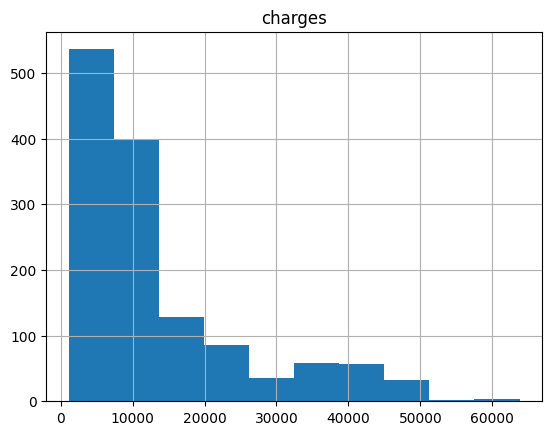

In [ ]:
df.hist("charges")
#menampilkan histogram dari biaya yang ditagih oleh asuransi

4. Memverifikasi data **(Verify Data)**

---
Dari dataset yang sudah disajikan, tidak ada ditemukannya data yang error, nilai-nilai yang hilang dan ditemukannya duplikat data.

# Data Preparation

1. Memilih data **(Select Data)**

Untuk mengetahui faktor yang dapat mempengaruhi premi asuransi, variabel yang relevan adalah jenis kelamin, usia, BMI, merokok/tidak merokok dan tagihan asuransi.

2. Membersihkan data **(Clean Data)**

Terdapat duplikasi pada satu baris data, yaitu "19,male,30.59,0,no,northwest,1639.5631" yang akan dihapus dengan syntax berikut

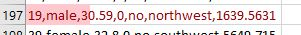

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
# menghapus data yang memiliki duplikat dan sekarang jumlah baris berkurang

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


3. Menyusun data **(Construct Data)**

Dibawah ini merupakan construct data dengan metode transform  dimana metode ini akan mengganti categorical data dengan angka

In [10]:
import numpy as np
import pandas as pd 

df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
df_categorical = df.select_dtypes(exclude=[np.number])

In [12]:
df_categorical

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [14]:
df_categorical['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
df_categorical.sex.value_counts()
#menampilan frekuensi distribusi dari tiap kolum

male      676
female    662
Name: sex, dtype: int64

In [20]:
df_categorical.sex.replace({"female":1, "male":2}, inplace= True)

In [18]:
df_categorical.smoker.replace({"yes":1, "no":2}, inplace= True)

5. Melakukan Format Ulang **(Data Format)**




In [21]:
df_categorical.head()

,sex,smoker,region
0,1,1,southwest
1,2,2,southeast
2,2,2,southeast
3,2,2,northwest
4,2,2,northwest


4. Mengintegrasi data **(Integrate Data)**

Karena pada kasus ini hanya memiliki satu dataset yang sudah memiliki semua data yang relevan untuk analisis, sehingga tidak perlu melakukan data integrasi.